<a href="https://colab.research.google.com/github/Shakibap/Data-Science-Portfo/blob/main/Classification_Project_to_predict_heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier

In [ ]:
#from google.colab import files
#files.upload()

Saving 16325569497737558.csv to 16325569497737558.csv


{'16325569497737558.csv': b'age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output\r\n63,1,3,145,233,1,0,150,0,2.3,0,0,1,1\r\n37,1,2,130,250,0,1,187,0,3.5,0,0,2,1\r\n41,0,1,130,204,0,0,172,0,1.4,2,0,2,1\r\n56,1,1,120,236,0,1,178,0,0.8,2,0,2,1\r\n57,0,0,120,354,0,1,163,1,0.6,2,0,2,1\r\n57,1,0,140,192,0,1,148,0,0.4,1,0,1,1\r\n56,0,1,140,294,0,0,153,0,1.3,1,0,2,1\r\n44,1,1,120,263,0,1,173,0,0,2,0,3,1\r\n52,1,2,172,199,1,1,162,0,0.5,2,0,3,1\r\n57,1,2,150,168,0,1,174,0,1.6,2,0,2,1\r\n54,1,0,140,239,0,1,160,0,1.2,2,0,2,1\r\n48,0,2,130,275,0,1,139,0,0.2,2,0,2,1\r\n49,1,1,130,266,0,1,171,0,0.6,2,0,2,1\r\n64,1,3,110,211,0,0,144,1,1.8,1,0,2,1\r\n58,0,3,150,283,1,0,162,0,1,2,0,2,1\r\n50,0,2,120,219,0,1,158,0,1.6,1,0,2,1\r\n58,0,2,120,340,0,1,172,0,0,2,0,2,1\r\n66,0,3,150,226,0,1,114,0,2.6,0,0,2,1\r\n43,1,0,150,247,0,1,171,0,1.5,2,0,2,1\r\n69,0,3,140,239,0,1,151,0,1.8,2,2,2,1\r\n59,1,0,135,234,0,1,161,0,0.5,1,0,3,1\r\n44,1,2,130,233,0,1,179,1,0.4,2,0,2,1\r\n42,1,0,140,226,0,

In [ ]:
data_full = pd.read_csv('16325569497737558.csv')

In [ ]:
data_full.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#Data Cleaning and Preprocissing

In [ ]:
data_full.shape

(303, 14)

In [ ]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data_full.isnull().sum().sum()

0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


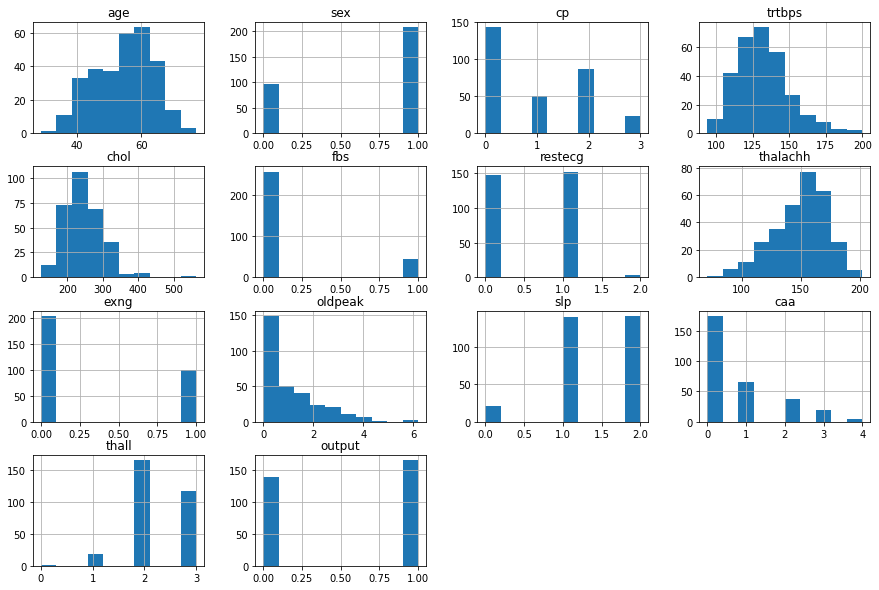

In [ ]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
data_full.hist(ax=ax)
plt.show()

In [ ]:
df = data_full.copy()

In [ ]:
X = df.drop('output', axis=1)
y = df.output

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#Data Modeling

###KNeighbors Classifier

In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train_scaled, y_train)
KNN_preds = KNN_model.predict(X_test_scaled)
print(classification_report(KNN_preds, y_test))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85        40
           1       0.80      0.92      0.86        36

    accuracy                           0.86        76
   macro avg       0.86      0.86      0.86        76
weighted avg       0.86      0.86      0.86        76



###Decision Tree Classifier

In [ ]:
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)
print(classification_report(tree_preds, y_test))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81        37
           1       0.80      0.85      0.83        39

    accuracy                           0.82        76
   macro avg       0.82      0.81      0.82        76
weighted avg       0.82      0.82      0.82        76



###Logistic Regresion

In [ ]:
logistic_model = LogisticRegression(solver='newton-cg')
logistic_model.fit(X_train, y_train)
logistic_preds = logistic_model.predict(X_test)
print(classification_report(logistic_preds, y_test))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88        33
           1       0.93      0.88      0.90        43

    accuracy                           0.89        76
   macro avg       0.89      0.90      0.89        76
weighted avg       0.90      0.89      0.90        76



###Support Vector Classifier

In [ ]:
svm_model = SVC(C=100, kernel='poly')
svm_model.fit(X_train_scaled, y_train)
svm_preds = svm_model.predict(X_test_scaled)
print(classification_report(svm_preds, y_test))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86        39
           1       0.83      0.92      0.87        37

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76



###Random Forest Classifier

In [ ]:
RF_model = RandomForestClassifier(max_depth=2, random_state=42)
RF_model.fit(X_train, y_train)
RF_preds = RF_model.predict(X_test)
print(classification_report(RF_preds, y_test))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85        31
           1       0.93      0.84      0.88        45

    accuracy                           0.87        76
   macro avg       0.86      0.87      0.87        76
weighted avg       0.88      0.87      0.87        76



###Naive Bayes Classifier

In [ ]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
NB_preds = NB_model.predict(X_test)
print(classification_report(NB_preds, y_test))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87        36
           1       0.88      0.90      0.89        40

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



###Ridge Classifier

In [ ]:
RG_model = RidgeClassifier()
RG_model.fit(X_train, y_train)
RG_preds = RG_model.predict(X_test)
print(classification_report(RG_preds, y_test))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        32
           1       0.93      0.86      0.89        44

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.89      0.88      0.88        76



#Result

because this project is dealing with a disease, the metric is recall. The highest recall for the label 1 belongs to the svm model with the score of 92% for the label 1 and 82% for the label 0. 

In [ ]:
final_model = svm_model